## 1. Reading The Dataset 

In [215]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [216]:
#Ensuring that all types of missing values are accounted for 
missing_value = ["N/A", "n/a", "na", "N/a", "n/A", "Na", "nA", np.nan]

In [217]:
df = pd.read_csv('./raw_data.csv', na_values = missing_value)

In [218]:
df.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

## 2. Removing Irrelevant Columns & Renaming Headings 

In [220]:
#The dataset has 49 columns, not all the columns are useful
#Some of the columns that need to be deleted can be identified by relevance 
#The null count can also be factored in

### 2.1 Finding the % of null values per column 

In [221]:
df.isnull().mean()*100

regio1                       0.000000
serviceCharge                2.569834
heatingType                 16.684397
telekomTvOffer              12.132788
telekomHybridUploadSpeed    83.254603
newlyConst                   0.000000
balcony                      0.000000
picturecount                 0.000000
pricetrend                   0.681421
telekomUploadSpeed          12.407662
totalRent                   15.070485
yearConstructed             21.218151
scoutId                      0.000000
noParkSpaces                65.388879
firingTypes                 21.188023
hasKitchen                   0.000000
geo_bln                      0.000000
cellar                       0.000000
yearConstructedRange        21.218151
baseRent                     0.000000
houseNumber                 26.415473
livingSpace                  0.000000
geo_krs                      0.000000
condition                   25.474800
interiorQual                41.906267
petsAllowed                 42.615957
street      

### 2.2 Dropping columns with more than 25% null values 

In [222]:
df = df[df.columns[df.isnull().mean()*100 < 25]]

In [223]:
df.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,...,noRooms,floor,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,False,False,6,4.62,10.0,840.0,...,4.0,1.0,4,True,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,False,True,8,3.47,10.0,NaN,...,3.0,NaN,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,True,True,8,2.72,2.4,1300.0,...,3.0,3.0,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,False,True,9,1.53,40.0,NaN,...,3.0,3.0,3,False,2,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,False,True,19,2.46,NaN,903.0,...,3.0,1.0,3,False,4,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,Feb20


### 2.3 Dropping columns that are not relevant 

In [224]:
df.drop(df.columns[[1,2,3,4,5,6,7,11,12,14,15,16,20,21,22,23,26,27,
        28,29,30,31,32,33]], axis = 1, inplace = True)

In [225]:
df.head()

,regio1,telekomUploadSpeed,totalRent,yearConstructed,hasKitchen,baseRent,livingSpace,geo_krs,geo_plz,noRooms,date
0,Nordrhein_Westfalen,10.0,840.0,1965.0,False,595.0,86.00,Dortmund,44269,4.0,May19
1,Rheinland_Pfalz,10.0,NaN,1871.0,False,800.0,89.00,Rhein_Pfalz_Kreis,67459,3.0,May19
2,Sachsen,2.4,1300.0,2019.0,False,965.0,83.80,Dresden,1097,3.0,Oct19
3,Sachsen,40.0,NaN,1964.0,False,343.0,58.15,Mittelsachsen_Kreis,9599,3.0,May19
4,Bremen,NaN,903.0,1950.0,False,765.0,84.97,Bremen,28213,3.0,Feb20


### 2.4 Renaming columns 

In [226]:
df.rename(columns={'regio1': 'state', 'telekomUploadSpeed': 'internet_speed', 'totalRent' : 'warm_rent',
          'yearConstructed' : 'year_constructed', 'hasKitchen' : 'kitchen', 'baseRent' : 'cold_rent',
          'livingSpace' : 'living_space', 'geo_krs' : 'city', 'geo_plz' : 'postal_code', 'noRooms' : 'room_count'}, 
          inplace=True)

In [227]:
df.head()

,state,internet_speed,warm_rent,year_constructed,kitchen,cold_rent,living_space,city,postal_code,room_count,date
0,Nordrhein_Westfalen,10.0,840.0,1965.0,False,595.0,86.00,Dortmund,44269,4.0,May19
1,Rheinland_Pfalz,10.0,NaN,1871.0,False,800.0,89.00,Rhein_Pfalz_Kreis,67459,3.0,May19
2,Sachsen,2.4,1300.0,2019.0,False,965.0,83.80,Dresden,1097,3.0,Oct19
3,Sachsen,40.0,NaN,1964.0,False,343.0,58.15,Mittelsachsen_Kreis,9599,3.0,May19
4,Bremen,NaN,903.0,1950.0,False,765.0,84.97,Bremen,28213,3.0,Feb20


## 3. Dealing With NA Values

### 3.1 Identifying remaining columns with NA

In [228]:
df.isnull().mean()*100

state                0.000000
internet_speed      12.407662
warm_rent           15.070485
year_constructed    21.218151
kitchen              0.000000
cold_rent            0.000000
living_space         0.000000
city                 0.000000
postal_code          0.000000
room_count           0.000000
date                 0.000000
dtype: float64

### 3.2 Replacing internet_speed NA values

In [229]:
#The mean of each state's internet_speed is used 
mean2 = df.groupby(['state'])['internet_speed'].mean()
df = df.set_index(['state'])
df['internet_speed'] = df['internet_speed'].fillna(mean2)
df = df.reset_index()
df.isnull().mean()*100

state                0.000000
internet_speed       0.000000
warm_rent           15.070485
year_constructed    21.218151
kitchen              0.000000
cold_rent            0.000000
living_space         0.000000
city                 0.000000
postal_code          0.000000
room_count           0.000000
date                 0.000000
dtype: float64

### 3.3 Replacing warm_rent NA values 

In [230]:
#The mean of each state's warm_rent is used 
mean1 = df.groupby(['state'])['warm_rent'].mean()
df = df.set_index(['state'])
df['warm_rent'] = df['warm_rent'].fillna(mean1)
df = df.reset_index()
df.isnull().mean()*100

state                0.000000
internet_speed       0.000000
warm_rent            0.000000
year_constructed    21.218151
kitchen              0.000000
cold_rent            0.000000
living_space         0.000000
city                 0.000000
postal_code          0.000000
room_count           0.000000
date                 0.000000
dtype: float64

### 3.4 Replacing year_constructed NA values

In [231]:
#The mean of each state's year_constructed is used 
mean3 = df.groupby(['state'])['year_constructed'].mean()
df = df.set_index(['state'])
df['year_constructed'] = df['year_constructed'].fillna(mean3)
df = df.reset_index()
df.isnull().mean()*100

state               0.0
internet_speed      0.0
warm_rent           0.0
year_constructed    0.0
kitchen             0.0
cold_rent           0.0
living_space        0.0
city                0.0
postal_code         0.0
room_count          0.0
date                0.0
dtype: float64

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   state             268850 non-null  object 
 1   internet_speed    268850 non-null  float64
 2   warm_rent         268850 non-null  float64
 3   year_constructed  268850 non-null  float64
 4   kitchen           268850 non-null  bool   
 5   cold_rent         268850 non-null  float64
 6   living_space      268850 non-null  float64
 7   city              268850 non-null  object 
 8   postal_code       268850 non-null  int64  
 9   room_count        268850 non-null  float64
 10  date              268850 non-null  object 
dtypes: bool(1), float64(6), int64(1), object(3)
memory usage: 20.8+ MB


### 3.5 Rounding the substituted data 

In [233]:
df.head()

,state,internet_speed,warm_rent,year_constructed,kitchen,cold_rent,living_space,city,postal_code,room_count,date
0,Nordrhein_Westfalen,10.000000,840.000000,1965.0,False,595.0,86.00,Dortmund,44269,4.0,May19
1,Rheinland_Pfalz,10.000000,3240.072688,1871.0,False,800.0,89.00,Rhein_Pfalz_Kreis,67459,3.0,May19
2,Sachsen,2.400000,1300.000000,2019.0,False,965.0,83.80,Dresden,1097,3.0,Oct19
3,Sachsen,40.000000,581.642534,1964.0,False,343.0,58.15,Mittelsachsen_Kreis,9599,3.0,May19
4,Bremen,24.981535,903.000000,1950.0,False,765.0,84.97,Bremen,28213,3.0,Feb20


In [234]:
df = df.round()
df.head()

,state,internet_speed,warm_rent,year_constructed,kitchen,cold_rent,living_space,city,postal_code,room_count,date
0,Nordrhein_Westfalen,10.0,840.0,1965.0,False,595.0,86.0,Dortmund,44269,4.0,May19
1,Rheinland_Pfalz,10.0,3240.0,1871.0,False,800.0,89.0,Rhein_Pfalz_Kreis,67459,3.0,May19
2,Sachsen,2.0,1300.0,2019.0,False,965.0,84.0,Dresden,1097,3.0,Oct19
3,Sachsen,40.0,582.0,1964.0,False,343.0,58.0,Mittelsachsen_Kreis,9599,3.0,May19
4,Bremen,25.0,903.0,1950.0,False,765.0,85.0,Bremen,28213,3.0,Feb20


## 4. Cleaning String Data 

### 4.1 Removing unwanted characters

In [235]:
for column in df.columns:
    if df[column].dtype == object:
        df[column] = df[column].str.replace(r'\W', "", regex = True)

In [236]:
df.head()

,state,internet_speed,warm_rent,year_constructed,kitchen,cold_rent,living_space,city,postal_code,room_count,date
0,Nordrhein_Westfalen,10.0,840.0,1965.0,False,595.0,86.0,Dortmund,44269,4.0,May19
1,Rheinland_Pfalz,10.0,3240.0,1871.0,False,800.0,89.0,Rhein_Pfalz_Kreis,67459,3.0,May19
2,Sachsen,2.0,1300.0,2019.0,False,965.0,84.0,Dresden,1097,3.0,Oct19
3,Sachsen,40.0,582.0,1964.0,False,343.0,58.0,Mittelsachsen_Kreis,9599,3.0,May19
4,Bremen,25.0,903.0,1950.0,False,765.0,85.0,Bremen,28213,3.0,Feb20


### 4.2 Replacing '_' with a space

In [237]:
for column in df.columns:
    if df[column].dtype == object:
        df[column] = df[column].str.replace("_", " ", regex = True)

In [238]:
df.head()

,state,internet_speed,warm_rent,year_constructed,kitchen,cold_rent,living_space,city,postal_code,room_count,date
0,Nordrhein Westfalen,10.0,840.0,1965.0,False,595.0,86.0,Dortmund,44269,4.0,May19
1,Rheinland Pfalz,10.0,3240.0,1871.0,False,800.0,89.0,Rhein Pfalz Kreis,67459,3.0,May19
2,Sachsen,2.0,1300.0,2019.0,False,965.0,84.0,Dresden,1097,3.0,Oct19
3,Sachsen,40.0,582.0,1964.0,False,343.0,58.0,Mittelsachsen Kreis,9599,3.0,May19
4,Bremen,25.0,903.0,1950.0,False,765.0,85.0,Bremen,28213,3.0,Feb20


## 5. Removing Outlier Data 

In [239]:
#Potentially affected variables - internet_speed, warm_rent, cold_rent, living_space, and room_count
#Intuitively it appears that warm_rent and cold_rent are the most affected
#The outliers in the other variables will not affect the analysis  

### 5.1 Warm_Rent 

#### 5.1.1 Visualizing the Mean, Max, and Min of Warm_Rent based on each state

In [240]:
#Creating a temporary dataframe 
col_names = ['Mean', 'Max', 'Min']
temp_df = pd.DataFrame(columns = col_names)

#Using mean, max, and min to identify outliers
temp_df['Mean'] = df.groupby(['state'])['warm_rent'].mean().round()
temp_df['Max'] = df.groupby(['state'])['warm_rent'].max()
temp_df['Min'] = df.groupby(['state'])['warm_rent'].min()
temp_df.head(20)

,Mean,Max,Min
state,,,
Baden Württemberg,1296.0,1234567.0,0.0
Bayern,1198.0,20466.0,0.0
Berlin,1385.0,51570.0,0.0
Brandenburg,677.0,8430.0,0.0
Bremen,774.0,3765.0,9.0
Hamburg,1412.0,11900.0,0.0
Hessen,1175.0,20588.0,0.0
Mecklenburg Vorpommern,571.0,3780.0,0.0
Niedersachsen,774.0,19519.0,0.0


#### 5.1.2 Visualizing the skewness of the data

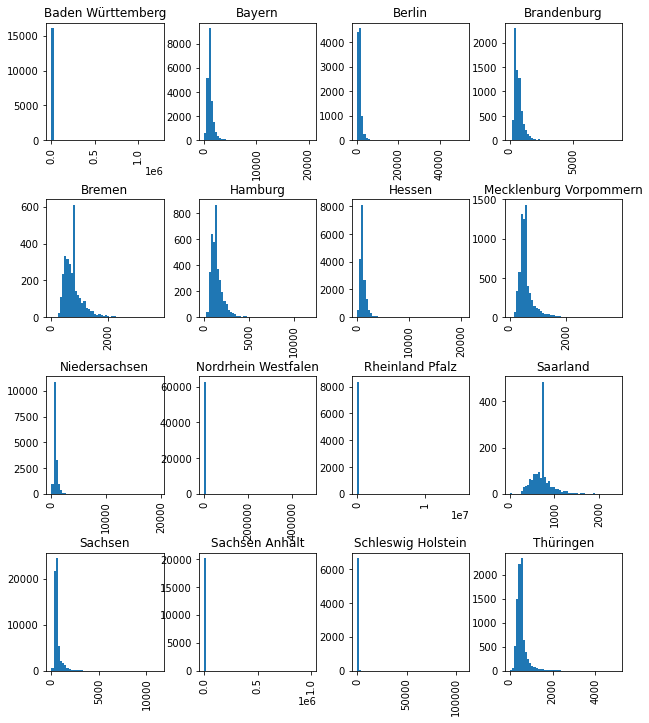

In [241]:
df['warm_rent'].hist(by=df['state'], bins = 50, figsize = (10,12));

#### 5.1.3 Removing outlier data using the IQR because the data isnt normally distributed

In [242]:
# Function to remove outliers based on IQR
def is_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    return ~df.between(lower_limit, upper_limit) 

#Applying function 
df = df[~df.groupby('state')['warm_rent'].apply(is_outlier)]

#### 5.1.4 Visualizing the new Mean, Max, and Min of Warm_Rent based on each state

In [243]:
temp_df['Mean'] = df.groupby(['state'])['warm_rent'].mean().round()
temp_df['Max'] = df.groupby(['state'])['warm_rent'].max()
temp_df['Min'] = df.groupby(['state'])['warm_rent'].min()
temp_df.head(20)

,Mean,Max,Min
state,,,
Baden Württemberg,1083.0,2040.0,75.0
Bayern,1061.0,2170.0,0.0
Berlin,1223.0,2865.0,0.0
Brandenburg,613.0,1303.0,0.0
Bremen,710.0,1345.0,220.0
Hamburg,1291.0,2725.0,0.0
Hessen,1056.0,2040.0,100.0
Mecklenburg Vorpommern,501.0,873.0,155.0
Niedersachsen,704.0,1197.0,219.0


#### 5.1.5 Visualizing the new skewness of the data

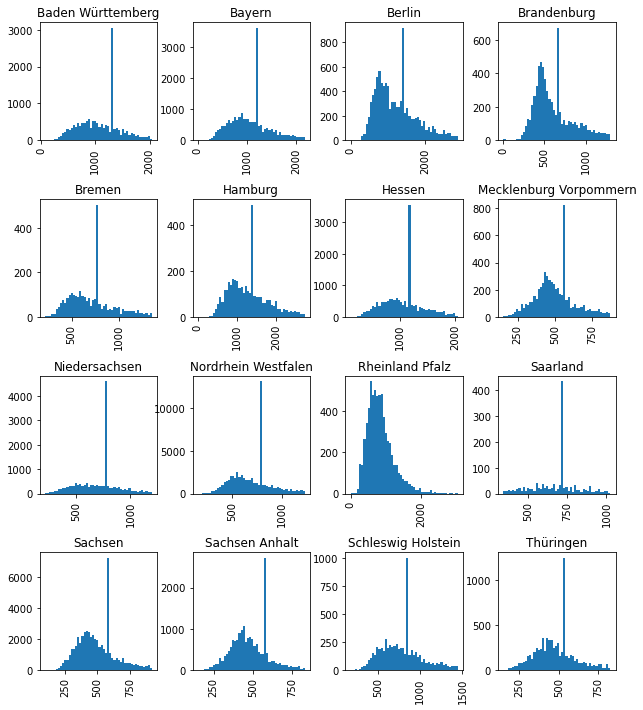

In [244]:
df['warm_rent'].hist(by=df['state'], bins = 50, figsize = (10,12));

### 5.2 Cold Rent 

#### 5.2.1 Visualizing the Mean, Max, and Min of Cold_Rent based on each state

In [245]:
#Creating a temporary dataframe 
col_names = ['Mean', 'Max', 'Min']
temp_df = pd.DataFrame(columns = col_names)

#Using mean, max, and min to identify outliers
temp_df['Mean'] = df.groupby(['state'])['cold_rent'].mean().round()
temp_df['Max'] = df.groupby(['state'])['cold_rent'].max()
temp_df['Min'] = df.groupby(['state'])['cold_rent'].min()
temp_df.head(20)

,Mean,Max,Min
state,,,
Baden Württemberg,891.0,6000.0,0.0
Bayern,890.0,7660.0,0.0
Berlin,1031.0,10816.0,0.0
Brandenburg,456.0,5000.0,1.0
Bremen,570.0,30990.0,145.0
Hamburg,1081.0,6000.0,160.0
Hessen,871.0,10500.0,1.0
Mecklenburg Vorpommern,360.0,2500.0,0.0
Niedersachsen,537.0,9999.0,0.0


#### 5.2.2 Visualizing the skewness of the data

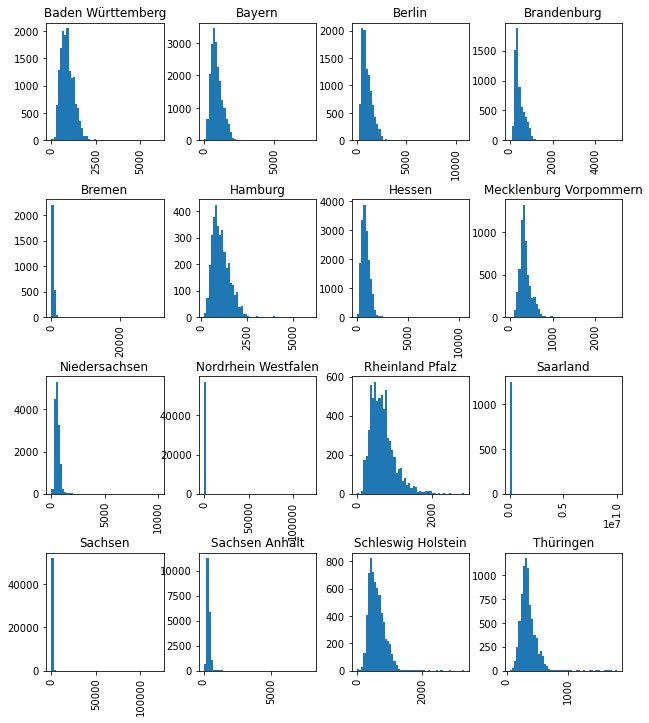

In [246]:
df['cold_rent'].hist(by=df['state'], bins = 50, figsize = (10,12));

#### 5.2.3 Removing outlier data using the IQR because the data isnt normally distributed

In [247]:
# Function to remove outliers based on IQR
def is_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    return ~df.between(lower_limit, upper_limit) 

#Applying function 
df = df[~df.groupby('state')['cold_rent'].apply(is_outlier)]

#### 5.2.4 Visualizing the new Mean, Max, and Min of Warm_Rent based on each state

In [248]:
temp_df['Mean'] = df.groupby(['state'])['cold_rent'].mean().round()
temp_df['Max'] = df.groupby(['state'])['cold_rent'].max()
temp_df['Min'] = df.groupby(['state'])['cold_rent'].min()
temp_df.head(20)

,Mean,Max,Min
state,,,
Baden Württemberg,872.0,1900.0,0.0
Bayern,863.0,1925.0,0.0
Berlin,1000.0,2396.0,0.0
Brandenburg,444.0,1000.0,1.0
Bremen,539.0,1200.0,145.0
Hamburg,1055.0,2300.0,160.0
Hessen,838.0,1890.0,1.0
Mecklenburg Vorpommern,341.0,615.0,90.0
Niedersachsen,520.0,1100.0,0.0


#### 5.2.5 Visualizing the new skewness of the data

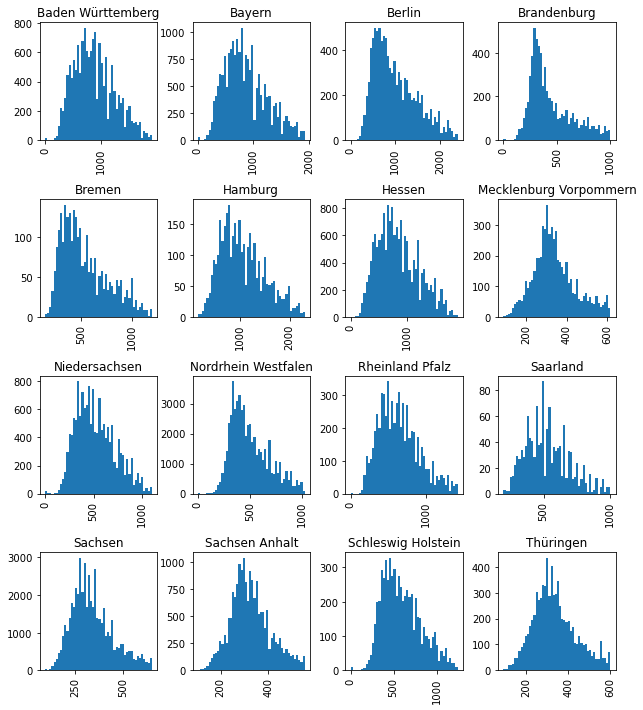

In [249]:
df['cold_rent'].hist(by=df['state'], bins = 50, figsize = (10,12));

## 6. Calculations Needed For Analysis 

In [250]:
df.head()

,state,internet_speed,warm_rent,year_constructed,kitchen,cold_rent,living_space,city,postal_code,room_count,date
0,Nordrhein Westfalen,10.0,840.0,1965.0,False,595.0,86.0,Dortmund,44269,4.0,May19
3,Sachsen,40.0,582.0,1964.0,False,343.0,58.0,Mittelsachsen Kreis,9599,3.0,May19
4,Bremen,25.0,903.0,1950.0,False,765.0,85.0,Bremen,28213,3.0,Feb20
5,Schleswig Holstein,2.0,841.0,1999.0,True,315.0,53.0,Schleswig Flensburg Kreis,24891,2.0,Feb20
6,Sachsen,2.0,380.0,1948.0,False,310.0,62.0,Mittelsachsen Kreis,9599,2.0,Feb20


In [251]:
# Column for utility costs 
df['utility_cost'] = df['warm_rent'] - df['cold_rent']
df.head()

,state,internet_speed,warm_rent,year_constructed,kitchen,cold_rent,living_space,city,postal_code,room_count,date,utility_cost
0,Nordrhein Westfalen,10.0,840.0,1965.0,False,595.0,86.0,Dortmund,44269,4.0,May19,245.0
3,Sachsen,40.0,582.0,1964.0,False,343.0,58.0,Mittelsachsen Kreis,9599,3.0,May19,239.0
4,Bremen,25.0,903.0,1950.0,False,765.0,85.0,Bremen,28213,3.0,Feb20,138.0
5,Schleswig Holstein,2.0,841.0,1999.0,True,315.0,53.0,Schleswig Flensburg Kreis,24891,2.0,Feb20,526.0
6,Sachsen,2.0,380.0,1948.0,False,310.0,62.0,Mittelsachsen Kreis,9599,2.0,Feb20,70.0


In [252]:
# Column for price per living_space (€ per m2)
df['price_per_space'] = df['cold_rent'] / df['living_space']
df['price_per_space'] = df['price_per_space'].round(2)
df.head()

,state,internet_speed,warm_rent,year_constructed,kitchen,cold_rent,living_space,city,postal_code,room_count,date,utility_cost,price_per_space
0,Nordrhein Westfalen,10.0,840.0,1965.0,False,595.0,86.0,Dortmund,44269,4.0,May19,245.0,6.92
3,Sachsen,40.0,582.0,1964.0,False,343.0,58.0,Mittelsachsen Kreis,9599,3.0,May19,239.0,5.91
4,Bremen,25.0,903.0,1950.0,False,765.0,85.0,Bremen,28213,3.0,Feb20,138.0,9.00
5,Schleswig Holstein,2.0,841.0,1999.0,True,315.0,53.0,Schleswig Flensburg Kreis,24891,2.0,Feb20,526.0,5.94
6,Sachsen,2.0,380.0,1948.0,False,310.0,62.0,Mittelsachsen Kreis,9599,2.0,Feb20,70.0,5.00


## 7. Exporting the Dataset

In [253]:
#Exporting as CSV 
df.to_csv('clean_data.csv',encoding='iso-8859-1')